In [1]:
from neural_network import MLP, CNN, CNNDual
from jax import random
import jax.numpy as jnp
from icecream import ic

key = random.key(42)

# Multi Level Perceptron (MLP)

In [2]:
model = MLP(layer_sizes=[4,6,4,5])
print(model.layer_sizes)

subkey, key = random.split(key)
params = model.init(subkey)

model.apply_single(params, jnp.array([2.2,5.1,1.6,6.2]))
model.apply_batch(params, jnp.array([[2.2,5.1,1.6,6.2],[2.2,5.5,1.6,6.2]]))

[4, 6, 4, 5]


Array([[ 1.7111232 ,  3.373485  ,  0.6726889 , -0.26877403,  0.1448667 ],
       [ 1.7924013 ,  3.6350818 ,  0.7425479 , -0.36859792,  0.00809073]],      dtype=float32)

# Convolutional Neural Netwrok (CNN)

In [3]:
import matplotlib.pyplot as plt

def show_img(
    img: jnp.ndarray, # shape = (num_filters, in_channels, kernel_size, kernel_size)
):
    batch_size, channels, kernel_height, kernel_width = img.shape
    fig, ax = plt.subplots(nrows=batch_size, ncols=channels, sharex=True, sharey=True)
    if batch_size == 1:
        ax = [ax]
    if channels == 1:
        ax = [[a] for a in ax]
    for row in range(batch_size):
        ax[row][0].set_ylabel(f"Batch {row}")
        for col in range(channels):
            m = ax[row][col].imshow(img[row,col])
            ax[row][col].set_xlabel(f"Channel {col}")
    plt.show()

[(3, 5, 5), (1, 4, 4)]


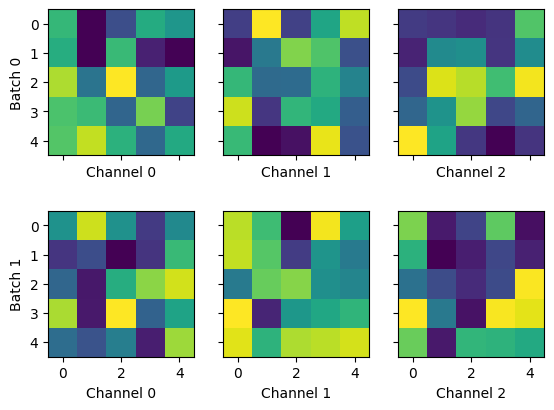

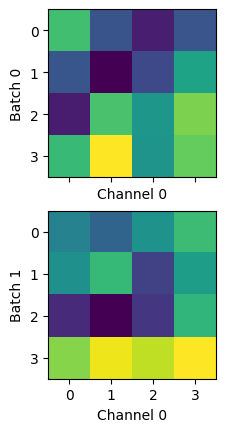

In [4]:
model = CNN(input_shape=(3,5,5), conv_layers=[(1,3,2,2)])
print(model.layer_sizes)

subkey, key = random.split(key)
params = model.init(subkey)

batch_size = 2
channels = 3
img = random.uniform(subkey, shape=(batch_size, channels, 5, 5))
show_img(img)

show_img(model.apply_batch(params, img))

# Dual input Convolutional network

In [7]:
model = CNNDual(
    input_shape_1=(1,4,4),
    input_shape_2=(6,3,3),
    conv_layers_input_1 = [(5,2,1,0)],
    conv_layers_input_2 = [(5,1,1,0)],
    conv_layers_stage_2 = [(10,2,1,0)],
    fc_layers=[25, 5]
)
for name, layer_sizes in model.layer_sizes.items():
    print(name, layer_sizes)
params = model.init(key)

CNN_input_1 [(1, 4, 4), (5, 3, 3)]
CNN_input_2 [(6, 3, 3), (5, 3, 3)]
CNN_stage_2 [(5, 3, 3), (10, 2, 2)]
MLP_stage_3 [40, 25, 5]


In [8]:
batch_size = 2

prim_key, seco_key, key = random.split(key, 3)
img_prim = random.uniform(prim_key, shape=(batch_size, 1, 4, 4))
img_seco = random.uniform(seco_key, shape=(1, 6, 3, 3))

print(model.apply_single(params, img_prim[0], img_seco[0]).shape)
print(model.apply_batch(params, img_prim, img_seco).shape)

(5,)
(2, 5)
